In [13]:
import numpy as np
from scipy.sparse.linalg import cg

def conjugate_gradient(A, b, x0, tol=1e-6, max_iter=1000):
    """
    Solves Ax = b using the Conjugate Gradient method.

    Args:
        A (np.ndarray): The symmetric, positive-definite matrix.
        b (np.ndarray): The right-hand side vector.
        x0 (np.ndarray): The initial guess for the solution.
        tol (float): The tolerance for convergence.
        max_iter (int): The maximum number of iterations.

    Returns:
        np.ndarray: The approximate solution x.
    """
    x = x0.copy()
    r = b - A @ x  # Initial residual
    p = r.copy()    # Initial search direction
    residuals = [r.copy()]
    directions = [p.copy()]
    rs_old = np.dot(r, r)

    for i in range(max_iter):
        Ap = A @ p
        alpha = rs_old / np.dot(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rs_new = np.dot(r, r)
        if np.sqrt(rs_new) < tol:
            print(f"Converged in {i+1} iterations.")
            # break

        beta = rs_new / rs_old
        p = r + beta * p
        residuals.append(r)
        directions.append(p)
        rs_old = rs_new
    else:
        print(f"Did not converge within {max_iter} iterations.")

    return x, directions, np.vstack(residuals)

In [14]:
def spd_from_gram(n, eps=1e-6, rng=None):
    rng = np.random.default_rng(rng)
    B = rng.normal(size=(n, n))
    A = B.T @ B
    A += eps * np.eye(n)       
    return B,A # Matriz no SPD, Matriz SPD


In [15]:
n = 3
A_tilde, A = spd_from_gram(3)
b = np.array([-1, -0.5, -1 ])
x, d, r = conjugate_gradient(A, b, [0,0,0])

Converged in 3 iterations.
Converged in 4 iterations.
Converged in 5 iterations.
Converged in 6 iterations.
Converged in 7 iterations.
Converged in 8 iterations.
Converged in 9 iterations.
Converged in 10 iterations.
Converged in 11 iterations.
Converged in 12 iterations.
Converged in 13 iterations.
Converged in 14 iterations.
Converged in 15 iterations.
Converged in 16 iterations.
Converged in 17 iterations.
Converged in 18 iterations.
Converged in 19 iterations.
Converged in 20 iterations.
Converged in 21 iterations.
Converged in 22 iterations.
Converged in 23 iterations.
Converged in 24 iterations.
Converged in 25 iterations.
Converged in 26 iterations.
Converged in 27 iterations.
Converged in 28 iterations.
Converged in 29 iterations.
Converged in 30 iterations.
Converged in 31 iterations.
Converged in 32 iterations.
Converged in 33 iterations.
Did not converge within 1000 iterations.


/tmp/ipykernel_213727/925798409.py:27: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rs_old / np.dot(p, Ap)


In [22]:
r

array([[-1.        , -0.5       , -1.        ],
       [ 0.28967523,  0.49599013, -0.5376703 ],
       [-0.22242819,  0.24061047,  0.10212295],
       ...,
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan]])

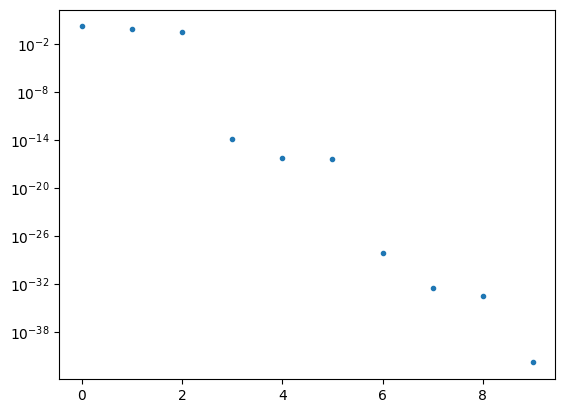

In [38]:
import matplotlib.pyplot as plt
normas = np.linalg.norm(r, axis=1)
plt.semilogy(normas[:10], ".")


In [7]:
A@x - b

array([-4.44089210e-16, -1.88737914e-15,  0.00000000e+00])

In [8]:
r@r.T

array([[ 2.25000000e+00,  1.11022302e-16, -1.11022302e-16],
       [ 1.11022302e-16,  1.93151121e+00, -2.26795076e-16],
       [-1.11022302e-16, -2.26795076e-16,  7.89180429e-01]])

In [9]:
np.linalg.norm(r @ r.T - np.diag(np.diag(r @ r.T))) 

3.900971925294076e-16

In [10]:
x, d, r = conjugate_gradient(A_tilde, b, [0,0,0]) # No da output ya que no converge luego de max_iters
A @ cg(A_tilde, b, [0,0,0])[0] - b # función de scipy retorna una mal solución.

Did not converge within 1000 iterations.


array([ -14.06065811, -181.91714867,   13.6788491 ])

In [11]:
# La idea es correr el algoritmo fuera de la función, permitiendo almacenar los residuos y direcciones.
A = A_tilde; b = b; x0 = [0,0,0]; max_iter = 1000; tol=1e-6

x = x0.copy()
r = b - A @ x  # Initial residual
p = r.copy()    # Initial search direction
residuals = [r.copy()]
directions = [p.copy()]
rs_old = np.dot(r, r)

for i in range(max_iter):
    Ap = A @ p
    alpha = rs_old / np.dot(p, Ap)
    x = x + alpha * p
    r = r - alpha * Ap
    rs_new = np.dot(r, r)
    if np.sqrt(rs_new) < tol:
        print(f"Converged in {i+1} iterations.")
        # break

    beta = rs_new / rs_old
    p = r + beta * p
    residuals.append(r)
    directions.append(p)
    rs_old = rs_new
else:
    print(f"Did not converge within {max_iter} iterations.")

A@x - b

Did not converge within 1000 iterations.


array([-1.36762422e+15, -1.69892050e+15, -1.85343139e+15])

In [35]:
normas_no_spd = np.linalg.norm(residuals, axis=1)
plt.scatter(y=normas_no_spd, x=np.arange(len(normas__nospd)))

NameError: name 'normas__nospd' is not defined

In [121]:
o = np.vstack(residuals) @ np.vstack(residuals).T

In [122]:
o - np.diag(np.diag(o))

array([[ 0.00000000e+00, -1.11022302e-16,  8.83738020e+00, ...,
         2.24918939e+13,  2.25995284e+13,  2.27075686e+13],
       [-1.11022302e-16,  0.00000000e+00, -2.52781610e+00, ...,
        -8.50182150e+12, -8.54250680e+12, -8.58334542e+12],
       [ 8.83738020e+00, -2.52781610e+00,  0.00000000e+00, ...,
         2.58950230e+15,  2.60189431e+15,  2.61433302e+15],
       ...,
       [ 2.24918939e+13, -8.50182150e+12,  2.58950230e+15, ...,
         0.00000000e+00,  6.62734120e+27,  6.65902411e+27],
       [ 2.25995284e+13, -8.54250680e+12,  2.60189431e+15, ...,
         6.62734120e+27,  0.00000000e+00,  6.69089074e+27],
       [ 2.27075686e+13, -8.58334542e+12,  2.61433302e+15, ...,
         6.65902411e+27,  6.69089074e+27,  0.00000000e+00]])

In [124]:
np.linalg.norm(o - np.diag(np.diag(o)))

6.399433456017062e+29